In [1]:
import tensorflow as tf

In [2]:
import tensorflow as tf

# Load the MNIST dataset using Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [3]:
type(x_train)

numpy.ndarray

In [4]:
type(y_train)

numpy.ndarray

In [5]:
type(x_test)

numpy.ndarray

In [6]:
type(y_test)

numpy.ndarray

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
# Access the shape of the third training image
x_train[89].shape

(28, 28)

In [9]:
# Assuming you've loaded the MNIST dataset as:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images (if not already done)
x_train = x_train / 255.0

# Select the third image and reshape it to (28, 28)
sample = x_train[890].reshape(28, 28)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

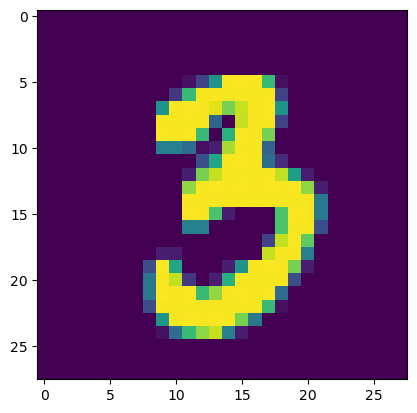

In [11]:
plt.imshow(sample)

## Parameters

We'll need to define 4 parameters, it is really (really) hard to know what good parameter values are on a data set for which you have no experience with, however since MNIST is pretty famous, we have some reasonable values for our data below. The parameters here are:

* Learning Rate - How quickly to adjust the cost function.
* Training Epochs - How many training cycles to go through
* Batch Size - Size of the 'batches' of training data

In [12]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

### Network Parameters

Here we have parameters which will directly define our Neural Network, these would be adjusted depending on what your data looked like and what kind of a net you would want to build. Basically just some numbers we will eventually use to define some variables later on in our model:

In [13]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
# Assuming you've already loaded the MNIST dataset:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Get the number of training samples
n_samples = x_train.shape[0]

###  TensorFlow Graph Input

In [14]:
x = tf.keras.Input(shape=(n_input,), dtype=tf.float32, name='x')
y = tf.keras.Input(shape=(n_classes,), dtype=tf.float32, name='y')

## MultiLayer Model

It is time to create our model, let's review what we want to create here.

First we receive the input data array and then to send it to the first hidden layer. Then the data will begin to have a weight attached to it between layers (remember this is initially a random value) and then sent to a node to undergo an activation function (along with a Bias as mentioned in the lecture). Then it will continue on to the next hidden layer, and so on until the final output layer. In our case, we will just use two hidden layers, the more you use the longer the model will take to run (but it has more of an opportunity to possibly be more accurate on the training data).

Once the transformed "data" has reached the output layer we need to evaluate it. Here we will use a loss function (also called a cost function) to evaluate how far off we are from the desired result. In this case, how many of the classes we got correct. 

Then we will apply an optimization function to minimize the cost (lower the error). This is done by adjusting weight values accordingly across the network. In out example, we will use the [Adam Optimizer](http://arxiv.org/pdf/1412.6980v8.pdf), which keep in mind, relative to other mathematical concepts, is an extremely recent development.

We can adjust how quickly to apply this optimization by changing our earlier learning rate parameter. The lower the rate the higher the possibility for accurate training results, but that comes at the cost of having to wait (physical time wise) for the results. Of course, after a certain point there is no benefit to lower the learning rate.

Now we will create our model, we'll start with 2 hidden layers, which use the [RELU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) activation function, which is a very simple rectifier function which essentially either returns x or zero. For our final output layer we will use a linear activation with matrix multiplication:

In [15]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Input tensor
    weights: Dictionary of weights
    biases: Dictionary of biases
    '''
    
    # First hidden layer with ReLU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second hidden layer with ReLU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out_h'])+biases['out_b']
    
    return out_layer


### Weights and Bias

In order for our tensorflow model to work we need to create two dictionaries containing our weight and bias objects for the model. We can use the **tf.variable** object type. This is different from a constant because TensorFlow's Graph Object becomes aware of the states of all the variables. A Variable is a modifiable tensor that lives in TensorFlow's graph of interacting operations. It can be used and even modified by the computation. We will generally have the model parameters be Variables. From the documentation string:

    A variable maintains state in the graph across calls to `run()`. You add a variable to the graph by constructing an instance of the class `Variable`.

    The `Variable()` constructor requires an initial value for the variable, which can be a `Tensor` of any type and shape. The initial value defines the type and shape of the variable. After construction, the type and shape of the variable are fixed. The value can be changed using one of the assign methods.
    
We'll use tf's built-in random_normal method to create the random values for our weights and biases (you could also just pass ones as the initial biases).

In [16]:

# Use tf.random.normal instead of tf.random_normal
weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1]), name='h1'),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2]), name='h2'),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_classes]), name='out_h')
}


In [17]:
# Use tf.random.normal instead of tf.random_normal
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(tf.random.normal([n_hidden_2]), name='b2'),
    'out': tf.Variable(tf.random.normal([n_classes]), name='out_b')
}


In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(n_input,)),  # Input layer
    tf.keras.layers.Dense(n_hidden_1, activation='relu', name='hidden_layer_1'),  # First hidden layer
    tf.keras.layers.Dense(n_hidden_2, activation='relu', name='hidden_layer_2'),  # Second hidden layer
    tf.keras.layers.Dense(n_classes, activation=None, name='output_layer')  # Output layer
])

In [20]:

# Define your model as previously shown
# (Assuming the model has already been defined as `model`)

# Define learning rate
learning_rate = 0.001

# Compile the model with loss and optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# You can view the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:

from tensorflow.keras import datasets

# Load MNIST dataset
mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)


# Reshape X_test if necessary for model input
X_test = X_test.reshape(-1, 28, 28, 1)  # For grayscale images, reshape to (num_samples, height, width, channels)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
# Define your model (as previously shown)
# (Assuming the model has already been defined and compiled)

# Define parameters
batch_size = 15
training_epochs = 10

# Create a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)

# Train the model
model.fit(train_dataset, epochs=training_epochs)

print("Model has completed {} Epochs of Training".format(training_epochs))


Epoch 1/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 4s 822us/step - accuracy: 0.9090 - loss: 0.3141
Epoch 2/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 845us/step - accuracy: 0.9712 - loss: 0.0978
Epoch 3/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - accuracy: 0.9802 - loss: 0.0648
Epoch 4/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 816us/step - accuracy: 0.9850 - loss: 0.0512
Epoch 5/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 823us/step - accuracy: 0.9870 - loss: 0.0418
Epoch 6/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 867us/step - accuracy: 0.9900 - loss: 0.0300
Epoch 7/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 808us/step - accuracy: 0.9904 - loss: 0.0283
Epoch 8/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 833us/step - accuracy: 0.9917 - loss: 0.0266
Epoch 9/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 815us/step - accuracy: 0.9930 - loss: 0.0214
Epoch 10/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 829us/step - accuracy: 0.9933 - loss: 0.0225
Model has completed 10 Epochs of Training


## Model Evaluations

Tensorflow comes with some built-in functions to help evaluate our model, including tf.equal and tf.cast with tf.reduce_mean.

**tf.equal()**

This is essentially just a check of predictions == y_test. In our case since we know the format of the labels is a 1 in an array of zeroes, we can compare argmax() location of that 1. Remember that **y** here is still that placeholder we created at the very beginning, we will perform a series of operations to get a Tensor that we can eventually fill in the test data for with an evaluation method. What we are currently running will still be empty of test data:

In [27]:
X_test = X_test.reshape(-1, 28 * 28).astype('float32') / 255.0  # Flattened inpu

y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


In [28]:
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(y_test, axis=1)

# Evaluate the model on the test set (for accuracy and loss)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print test accuracy and loss
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Confusion Matrix using TensorFlow
conf_matrix = tf.math.confusion_matrix(labels=y_true_classes, predictions=y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Additional metrics using TensorFlow (Precision, Recall, F1-Score)
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
precision.update_state(y_true_classes, y_pred_classes)
recall.update_state(y_true_classes, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.9699 - loss: 0.1777
Test Loss: 0.14727112650871277
Test Accuracy: 0.9736999869346619
Confusion Matrix:
tf.Tensor(
[[ 971    1    0    1    1    2    2    0    1    1]
 [   0 1122    1    1    0    2    2    0    7    0]
 [   2    1 1015    3    1    0    0    4    5    1]
 [   0    0    3  982    0   10    0    5    2    8]
 [   2    1    3    0  947    4    8    2    1   14]
 [   2    0    0    5    2  876    1    0    4    2]
 [   2    1    0    1    2   40  908    1    2    1]
 [   1    5    5    1    2    1    0 1006    5    2]
 [   2    1    2    4    7   14    0    1  942    1]
 [   4    2    0    3   10   11    2    6    3  968]], shape=(10, 10), dtype=int32)


In [30]:
precision_value = precision.result().numpy()
recall_value = recall.result().numpy()
f1_score = 2 * (precision_value * recall_value) / (precision_value + recall_value)

In [31]:
print(f"Precision: {precision_value}")
print(f"Recall: {recall_value}")
print(f"F1-Score: {f1_score}")

Precision: 0.9990015625953674
Recall: 0.9983370304107666
F1-Score: 0.9986692243279425
